<a href="https://colab.research.google.com/github/Damanger/COLAB_CF/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
np.random.seed(123)
puntos = np.random.rand( 300,2 )*2-1

In [19]:
puntos[:100, ]  += [2,2]
puntos[100:200, ]  += [-1,2]
puntos[200:200, ]  += [-1,5]

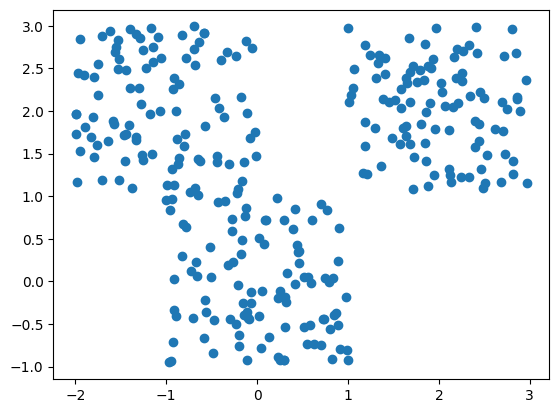

In [20]:
plt.scatter(puntos[:, 0], puntos[:, 1])

In [21]:
n_clusters = 5
clusters_indx = np.arange( puntos.shape[0])
np.random.shuffle(clusters_indx)
clusters_indx[:n_clusters]

array([105, 270,  95, 266,  63])

In [22]:
clusters = puntos[clusters_indx[:n_clusters]]
clusters

array([[-0.4154014 ,  2.03743318],
       [-0.50497369,  0.04973244],
       [ 1.41219145,  2.43551512],
       [ 0.23201296, -0.88212104],
       [ 1.51508413,  2.12871809]])

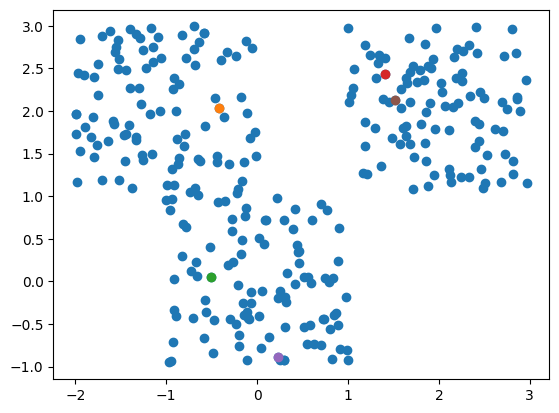

In [23]:
plt.scatter(puntos[:, 0], puntos[:, 1])
for indx in np.arange(n_clusters):
  plt.scatter(clusters[indx, 0], clusters[indx, 1])

In [24]:
def distancia(x1, x2):
  diff =  x1-x2
  diff =  diff**2
  diff = np.sqrt( np.sum(diff) )
  return diff

In [25]:
distancia(puntos[0], puntos[1])

1.0786265806252007

In [26]:
for iter in range(10):
  asignaciones = np.zeros((puntos.shape[0]))

  indice = 0
  for p in puntos:
    asignado = -1
    mejor_distancia = -1
    for c in np.arange(  n_clusters):
      if asignado == -1:
        mejor_distancia = distancia( clusters[c], p)
        asignado = c
      else:
        d = distancia( clusters[c], p)
        if d < mejor_distancia:
            mejor_distancia = d
            asignado = c

    asignaciones[indice] = asignado
    indice += 1

  clusters = np.zeros( (n_clusters, puntos.shape[1] ) )
  for indx in np.arange(puntos.shape[0]):
    clusters[ int(asignaciones[indx]) ] += puntos[indx]  / (asignaciones==asignaciones[indx]).sum()


In [27]:
centroides = np.zeros( (n_clusters, puntos.shape[1] ) )
for indx in np.arange(puntos.shape[0]):
  centroides[ int(asignaciones[indx]) ] += puntos[indx]  / (asignaciones==asignaciones[indx]).sum()


In [28]:
centroides

array([[-1.212385  ,  2.22621944],
       [-0.32399914,  0.85338951],
       [ 1.75432003,  2.46534237],
       [ 0.18950147, -0.41491668],
       [ 2.19048406,  1.63191077]])

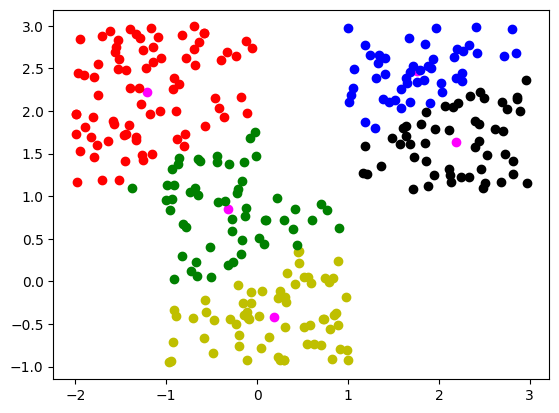

In [29]:
colores = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'y',
    4: 'k',
    5: 'o'
}

plt.scatter(centroides[:, 0], centroides[:, 1], color = 'magenta')

for indx in np.arange(puntos.shape[0]):
  color =  colores[   asignaciones[indx] ]
  plt.scatter(puntos[indx, 0], puntos[indx, 1], color = color)